<a href="https://colab.research.google.com/github/Idk507/computer_vision_learning_cnn/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models

In [64]:
"""
Transfer LEarning is leveraging a working models existing architecture and learned patterns for out own problem
1.Can leverage on exixting NN
2.Can leverage on working neural network
"""

'\nTransfer LEarning is leveraging a working models existing architecture and learned patterns for out own problem\n1.Can leverage on exixting NN\n2.Can leverage on working neural network\n'

In [65]:
!nvidia-smi

Tue Jan 30 18:59:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0              25W /  70W |    615MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Download and become with data

In [66]:
import zipfile

#download the data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-01-30 18:59:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M  41.0MB/s    in 4.5s    

2024-01-30 18:59:41 (35.5 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [67]:
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [68]:
zip_ref

<zipfile.ZipFile [closed]>

In [69]:
import os

#walk through the dataset

for dir_path,dir_names,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dir_names)} directories and {len(filenames)} images in {dir_path}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/train
There are 0 directories and 75 images in 10_food_classes_10_percent/train/steak
There are 0 directories and 75 images in 10_food_classes_10_percent/train/hamburger
There are 0 directories and 75 images in 10_food_classes_10_percent/train/fried_rice
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ramen
There are 0 directories and 75 images in 10_food_classes_10_percent/train/sushi
There are 0 directories and 75 images in 10_food_classes_10_percent/train/pizza
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 images in 10_food_classes_10_percent/train/grilled_salmon
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ice_cream
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_curry
There are 10 director

In [70]:
"""
We will use ImageDataGenerator class to load in our images
"""

from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_SHAPE =(224,224)
BATCH_SIZE = 32

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Images")

train_data_10_percent = train_datagen.flow_from_directory(train_dir,target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="categorical")

print("Testing Images")

test_data_10_percent = test_datagen.flow_from_directory(test_dir,target_size=IMG_SHAPE,batch_size = BATCH_SIZE,class_mode="categorical")


Training Images
Found 750 images belonging to 10 classes.
Testing Images
Found 2500 images belonging to 10 classes.


In [71]:
#setting up the callbacks
"""
Callbacks are extra functionality you can add to your models to be performed during or after training.
1.Tracking experiments with tensorboard
2.Model checkpoints with modelcheckpoint Callbacks
3.Stopping a model from training
"""

'\nCallbacks are extra functionality you can add to your models to be performed during or after training.\n1.Tracking experiments with tensorboard\n2.Model checkpoints with modelcheckpoint Callbacks\n3.Stopping a model from training\n'

In [87]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [73]:
!pip install -U tensorflow_hub

## Creating models using Tensorflow Hub


In [74]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers



In [75]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [76]:
def create_model(model_url,num_classes = 10):
  """
  Take a Tensorflow HubURL and create keras SEquential model witht it

  Args:
  model_url (str): A tensorlow hub feature ectraction URL
  num_classes(int) : Number of output neurona in the output layer

  Return:
  An uncompiled keras Sequential model with mode_url as feature extraction

  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMG_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [77]:
resnet_model = create_model(resnet_url,num_classes = train_data_10_percent.num_classes)

In [78]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [79]:
resnet_model.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics =["accuracy"] )

In [88]:
resnet_history = resnet_model.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data = test_data_10_percent,validation_steps=len(test_data_10_percent),callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20240130-190853
Epoch 1/5
24/24 [==============================] - 23s 612ms/step - loss: 1.9621 - accuracy: 0.3680 - val_loss: 1.2268 - val_accuracy: 0.6072
Epoch 2/5
24/24 [==============================] - 11s 462ms/step - loss: 0.8966 - accuracy: 0.7453 - val_loss: 0.8470 - val_accuracy: 0.7212
Epoch 3/5
24/24 [==============================] - 13s 547ms/step - loss: 0.6163 - accuracy: 0.8133 - val_loss: 0.7570 - val_accuracy: 0.7500
Epoch 4/5
24/24 [==============================] - 12s 499ms/step - loss: 0.4753 - accuracy: 0.8880 - val_loss: 0.7126 - val_accuracy: 0.7628
Epoch 5/5
24/24 [==============================] - 13s 547ms/step - loss: 0.3735 - accuracy: 0.9173 - val_loss: 0.6639 - val_accuracy: 0.7864


In [96]:
import matplotlib.pyplot as plt

def plt_loss_curves(history):
  """
  Args:
  History: Tensorflow history object
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()



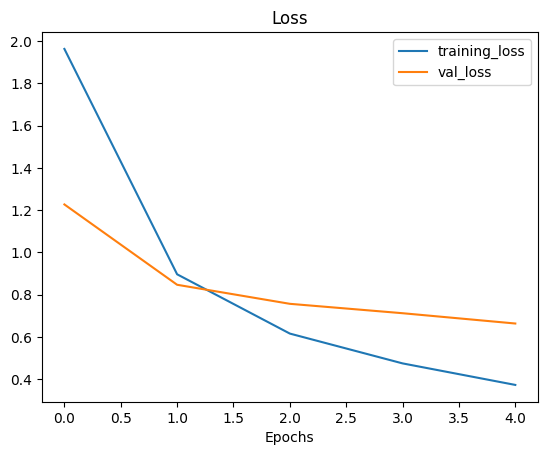

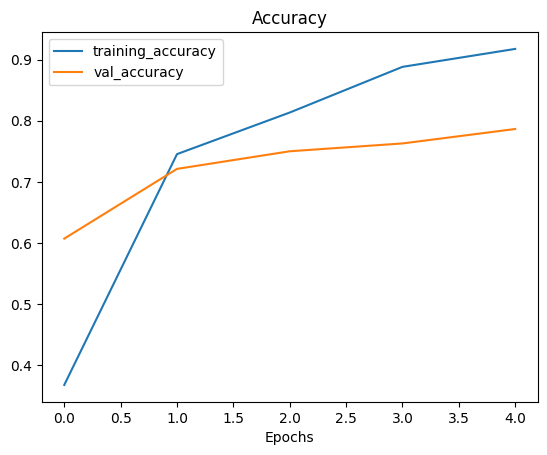

In [97]:
plt_loss_curves(resnet_model.history)

Efficienet

In [106]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data_10_percent,
                                              validation_steps=len(test_data_10_percent),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20240130-195313
Epoch 1/5
24/24 [==============================] - 27s 575ms/step - loss: 1.8255 - accuracy: 0.4533 - val_loss: 1.2711 - val_accuracy: 0.7404
Epoch 2/5
24/24 [==============================] - 11s 475ms/step - loss: 1.0588 - accuracy: 0.7640 - val_loss: 0.8494 - val_accuracy: 0.8256
Epoch 3/5
24/24 [==============================] - 13s 539ms/step - loss: 0.7600 - accuracy: 0.8213 - val_loss: 0.6864 - val_accuracy: 0.8456
Epoch 4/5
24/24 [==============================] - 11s 452ms/step - loss: 0.6144 - accuracy: 0.8547 - val_loss: 0.6013 - val_accuracy: 0.8572
Epoch 5/5
24/24 [==============================] - 10s 428ms/step - loss: 0.5170 - accuracy: 0.8893 - val_loss: 0.5500 - val_accuracy: 0.8660


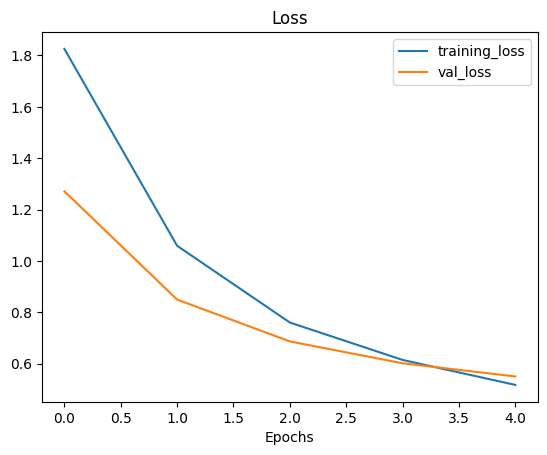

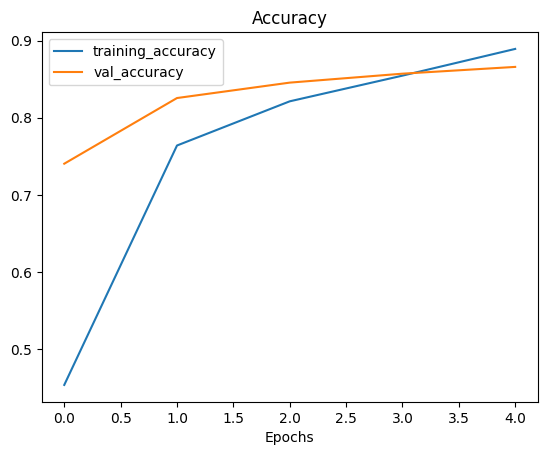

In [109]:
plt_loss_curves(efficientnet_history)

In [110]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2024-01-30 20:02:13.382222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 20:02:13.382294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 20:02:13.383685: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 20:02:14.436169: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb